In [1]:
import pandas as pd
import spotipy    # la librairie pour manipuler l'api spotify
import spotipy.util as util
import numpy as np
import matplotlib.pyplot as plt

In [2]:
username ="1124005172"
client_id = "27b85b868d4a4a0f9f6da276d6e85fb0"
client_secret ="8a59006210a74bd1add4ae673eb1b0a5"
redirect_uri = "http://localhost:8888/tree/AutoList/PythonProject"

scope = 'user-library-read playlist-read-private playlist-modify-private playlist-modify-public playlist-read-collaborative'

In [3]:
#Get an API token
token = util.prompt_for_user_token(username, scope, client_id = client_id , client_secret = client_secret ,redirect_uri = redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [4]:
#Retrieve all songs ids from saved tracks
list_of_songs_ids = []
max_items_number = 50 #The maximum number of items that we are able to get through the api in one request
current_offset = 0
json_tracks = sp.current_user_saved_tracks(limit=max_items_number, offset = current_offset)

while len(json_tracks['items']) > 0:
    for item in json_tracks['items']:
        list_of_songs_ids.append(item['track']['id'])
    current_offset += max_items_number
    json_tracks = sp.current_user_saved_tracks(limit=max_items_number, offset = current_offset)

In [5]:
list_of_songs_ids.__len__()

631

In [6]:
#Retrieve all features for each previously retrieved songs
list_of_features = []
max_features_number = 100 #The maximum number of features that we are able to get through the api in one request
current_index = 0

if len(list_of_songs_ids) > max_features_number:
    while current_index < len(list_of_songs_ids):
        current_index += max_features_number
        previous_index = current_index - max_features_number
        
        if current_index > len(list_of_songs_ids):
            current_index = len(list_of_songs_ids)
        
        for feature in sp.audio_features(list_of_songs_ids[previous_index:current_index]):
            list_of_features.append(feature)           
else:
    list_of_features.append(sp.audio_features(list_of_songs_ids[0:len(list_of_songs_ids)]))

In [7]:
print(len(list_of_features))

631


In [8]:
list_of_features[1] #list_of_feature[0] doesn't seem to have all the unnecessary keys

{'danceability': 0.483,
 'energy': 0.412,
 'key': 7,
 'loudness': -8.461,
 'mode': 1,
 'speechiness': 0.0402,
 'acousticness': 0.737,
 'instrumentalness': 0,
 'liveness': 0.116,
 'valence': 0.247,
 'tempo': 170.163,
 'type': 'audio_features',
 'id': '41zXlQxzTi6cGAjpOXyLYH',
 'uri': 'spotify:track:41zXlQxzTi6cGAjpOXyLYH',
 'track_href': 'https://api.spotify.com/v1/tracks/41zXlQxzTi6cGAjpOXyLYH',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/41zXlQxzTi6cGAjpOXyLYH',
 'duration_ms': 203569,
 'time_signature': 3}

In [9]:
#Deleting unnecessary keys from features
entries_to_delete = ('uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'type')

for index in range(0, len(list_of_features)):
    for entry in entries_to_delete:
        if entry in list_of_features[index]:
            del list_of_features[index][entry]

In [10]:
#Cleaned
list_of_features[1]

{'danceability': 0.483,
 'energy': 0.412,
 'key': 7,
 'loudness': -8.461,
 'mode': 1,
 'speechiness': 0.0402,
 'acousticness': 0.737,
 'instrumentalness': 0,
 'liveness': 0.116,
 'valence': 0.247,
 'tempo': 170.163,
 'id': '41zXlQxzTi6cGAjpOXyLYH'}

In [11]:
#Preparing data
data = {} #format : {'column_name_1': (data_of_column_name_1), 'column_name_2': (data_of_column_name_2), ...}

for key, value in list_of_features[0].items():
    
    data[key] = (value,)

for index in range(1, len(list_of_features)):
    for key, value in list_of_features[index].items():
        data[key] += (value,)

In [12]:
data

{'danceability': (0.777,
  0.483,
  0.632,
  0.773,
  0.629,
  0.589,
  0.669,
  0.579,
  0.689,
  0.691,
  0.517,
  0.351,
  0.577,
  0.515,
  0.517,
  0.737,
  0.826,
  0.704,
  0.322,
  0.564,
  0.593,
  0.662,
  0.255,
  0.573,
  0.365,
  0.718,
  0.71,
  0.694,
  0.64,
  0.854,
  0.761,
  0.803,
  0.71,
  0.598,
  0.455,
  0.562,
  0.391,
  0.578,
  0.588,
  0.618,
  0.779,
  0.702,
  0.637,
  0.595,
  0.612,
  0.824,
  0.823,
  0.422,
  0.73,
  0.638,
  0.542,
  0.462,
  0.656,
  0.564,
  0.432,
  0.619,
  0.666,
  0.586,
  0.781,
  0.711,
  0.576,
  0.669,
  0.279,
  0.52,
  0.663,
  0.404,
  0.897,
  0.595,
  0.712,
  0.827,
  0.618,
  0.747,
  0.577,
  0.675,
  0.72,
  0.562,
  0.381,
  0.845,
  0.754,
  0.768,
  0.762,
  0.47,
  0.737,
  0.738,
  0.653,
  0.593,
  0.683,
  0.645,
  0.682,
  0.588,
  0.828,
  0.75,
  0.723,
  0.691,
  0.588,
  0.594,
  0.758,
  0.67,
  0.594,
  0.611,
  0.673,
  0.71,
  0.648,
  0.679,
  0.695,
  0.491,
  0.575,
  0.726,
  0.747,
  0.624,
  0.

In [13]:
df_items_features = pd.DataFrame(data = data)
df_items_features = df_items_features.set_index('id')

In [14]:
df_items_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
5t3Vk8bRKylx4fjj7qlbib,0.777,0.422,0,-10.114,1,0.0482,0.919000,0.008770,0.0958,0.1870,120.041
41zXlQxzTi6cGAjpOXyLYH,0.483,0.412,7,-8.461,1,0.0402,0.737000,0.000000,0.1160,0.2470,170.163
5Fli1xRi01bvCjsZvKWro0,0.632,0.908,8,-3.511,1,0.0458,0.007620,0.000172,0.1670,0.7640,110.024
4BiiOzZCrXEzHRLYcYFiD5,0.773,0.699,1,-5.982,0,0.0958,0.488000,0.000004,0.0814,0.5130,104.941
73WJ6rYbtFi0Z2T4hPS1iN,0.629,0.745,6,-2.936,1,0.0649,0.147000,0.000000,0.2570,0.4960,99.995
7Jwe4iWB1G6c7TE7fRedrm,0.589,0.923,1,-5.461,1,0.0353,0.001180,0.338000,0.0710,0.0378,128.041
0Dn40gxVCMo5TkgS8Ik18Q,0.669,0.574,4,-6.442,0,0.0286,0.017500,0.002940,0.1460,0.2730,120.013
1rqqCSm0Qe4I9rUvWncaom,0.579,0.904,5,-2.729,1,0.0618,0.193000,0.000000,0.0640,0.6810,82.014
5VGBgPVFO3e0lWz4WHYntQ,0.689,0.901,7,-1.431,1,0.0678,0.145000,0.000010,0.4590,0.6510,125.115


(array([ 2.,  0.,  5.,  4.,  3., 12., 17., 19., 32., 56., 81., 79., 75.,
        78., 81., 37., 33., 11.,  2.,  4.]),
 array([0.109  , 0.15245, 0.1959 , 0.23935, 0.2828 , 0.32625, 0.3697 ,
        0.41315, 0.4566 , 0.50005, 0.5435 , 0.58695, 0.6304 , 0.67385,
        0.7173 , 0.76075, 0.8042 , 0.84765, 0.8911 , 0.93455, 0.978  ]),
 <a list of 20 Patch objects>)

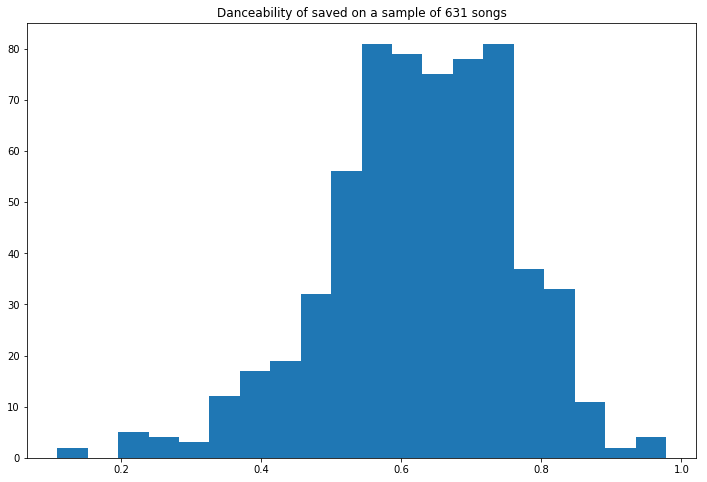

In [45]:
fig = plt.figure(figsize=(12,8))
x_danceability = df_items_features['danceability']
plot_title = "Danceability of saved on a sample of " + str(len(list_of_features)) + " songs"
plt.title(plot_title)
plt.hist(bins = 20, x = x_danceability, )

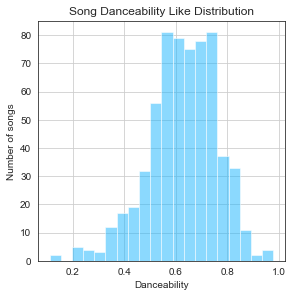

In [56]:
all_figures = plt.figure(figsize=(15,15))

#Danceability
ax3 = all_figures.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Number of songs')
ax3_title = "Danceability"
ax3.set_title('Song Danceability Like Distribution')
x_danceability.hist(alpha= 0.5, bins=20)